In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Matplotlib font sizes
TINY_SIZE = 8
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=TINY_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc("axes", grid=True)
plt.rc("lines", linewidth=4)
plt.rc("savefig", facecolor="white")

line_alpha = 0.8

In [3]:
def export_legend(legend, filename="legend.png"):
    fig = legend.figure
    fig.canvas.draw()
    bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

In [4]:
def get_steps_and_col(df, col):
    steps = np.array(df["_step"])
    vals = np.array(df[col])
    ii = np.where(~np.isnan(np.array(vals)))
    return steps[ii], vals[ii]

In [5]:
MAX_SAMPLES = 1000000
api = wandb.Api()

In [6]:
riglsg, riglsm = list(
    api.runs(
        "ml-reprod-2020/cifar100",
        filters={
            "state": "finished",
            "config.seed": 3,
            "config.masking.density": 0.2,
            "config.masking.sparse_init": "random",
            "config.masking.name": "RigL",
        },
    )
)

In [7]:
random_name = "Random"
erk_name = "ERK"
sg_name = "Sparse Grad"
sm_name = "Sparse Mmt"

In [8]:
rigl_random_flops = 0.2
rigl_erk_flops = 0.38

In [9]:
flop_col = "Avg Inference FLOPs"
sg_history = riglsg.history(samples=MAX_SAMPLES)
sm_history = riglsm.history(samples=MAX_SAMPLES)

In [10]:
default_mpl_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

names = [random_name, erk_name, sg_name, sm_name]

COLORS = {}
for i, k in enumerate(names):
    COLORS[k] = default_mpl_cycle[i]

In [13]:
from brokenaxes import brokenaxes

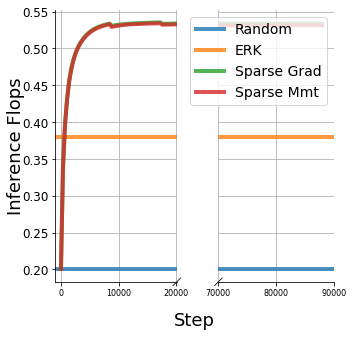

In [41]:
name = f"cifar100_inference_flops"
plt.figure(figsize=(5, 5))

bax = brokenaxes(xlims=((-1000, 20100), (70000, 90100)), wspace=0.35)


bax.axhline(
    rigl_random_flops, label=random_name, alpha=line_alpha, color=COLORS[random_name]
)
bax.axhline(rigl_erk_flops, label=erk_name, alpha=line_alpha, color=COLORS[erk_name])
bax.plot(
    *get_steps_and_col(sg_history, flop_col),
    label=sg_name,
    alpha=line_alpha,
    color=COLORS[sg_name],
)
bax.plot(
    *get_steps_and_col(sm_history, flop_col),
    label=sm_name,
    alpha=line_alpha,
    color=COLORS[sm_name],
)

bax.set_xlabel("Step")
bax.set_ylabel("Inference Flops")

# plt.subplots_adjust(left=0.18)
# legend = bax.legend(bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
legend = bax.legend(loc="upper right")
export_legend(legend, f"figs/pdfs/{name}_legend.pdf")

plt.savefig(f"figs/pdfs/{name}.pdf", bbox_inches="tight")
plt.savefig(f"figs/pngs/{name}.png", bbox_inches="tight")


plt.show()